# <b><span style='color:#e61227'></span> Insurance Data Science - Project Assignment 2023/2024


## Authors:
- Luís Ribeiro (nº 20231536)
- Renato Morais (nº 20231135)
- Fernando Tiago (nº 20231535)
- Thiago Bellas (nº 20231131)
- Saad Islam (nº 20230513)

  </b>

#### <b><span style='color:#e61227'>|</span> Load Data files and initial analysis</b>
- File autodata.txt
- File claimsdata.txt


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

auto_data_txt = "autodata.txt"
claims_data_txt = "claimsdata.txt"


Start by reading claims:

In [2]:
claims = pd.read_csv(claims_data_txt, delimiter=';')
claims

,n,ncontract,coverage,cost
6,6,4075803,2DO,512.74
7,7,4075803,1RC,0.00
14,14,4024277,2DO,89.70
16,16,4024277,1RC,2772.16
33,33,4083980,2DO,566.84
...,...,...,...,...
105328,105328,3251693,4BG,251.53
105359,105359,2230510,2DO,173.42
105367,105367,2239298,2DO,84.05
105374,105374,2263186,4BG,318.66


Read portfolio:

In [3]:
portfolio = pd.read_csv(auto_data_txt, delimiter=';')
portfolio

,ncontract,exposition,zone,power,agevehicle,agedriver,bonus,brand,fuel,popdensity,region
12,27,0.870000,C,7,0,56,50,12,D,93,13
57,115,0.720000,D,5,0,45,50,12,E,54,13
60,121,0.050000,C,6,0,37,55,12,D,11,13
68,142,0.900000,C,10,10,42,50,12,D,93,13
76,155,0.120000,C,7,0,59,50,12,E,73,13
...,...,...,...,...,...,...,...,...,...,...,...
677915,6114232,0.030000,E,7,0,43,50,12,E,11,13
677919,6114236,0.030000,A,11,0,56,50,12,D,94,13
677966,6114283,0.010000,E,9,0,32,72,12,D,93,6
677979,6114296,0.005479,E,4,0,22,90,12,E,93,2


Filter for only third liability:

In [4]:
TPclaims = claims[claims.coverage == "1RC"]
TPclaims

,n,ncontract,coverage,cost
7,7,4075803,1RC,0.00
16,16,4024277,1RC,2772.16
75,75,4020011,1RC,401.74
122,122,4017796,1RC,0.00
155,155,4018480,1RC,38.59
...,...,...,...,...
105211,105211,2215010,1RC,552.54
105227,105227,2247990,1RC,170.33
105243,105243,3239322,1RC,789.87
105265,105265,3252766,1RC,1120.84


In [5]:
### Organizing the files data ###
### Number of Claims per Policy ###

# Counting the number of claims for each policy
T = TPclaims['ncontract'].value_counts()
T1 = T.index.to_numpy()
T2 = T.values
n1 = pd.DataFrame({'ncontract': T1, 'nclaims': T2})
I = portfolio['ncontract'].isin(T1)
T1 = portfolio.loc[~I, 'ncontract']
n2 = pd.DataFrame({'ncontract': T1, 'nclaims': 0})
number = pd.concat([n1, n2])
print(number['nclaims'].value_counts())

nclaims
0     47510
1      2313
2       162
3        12
4         2
16        1
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

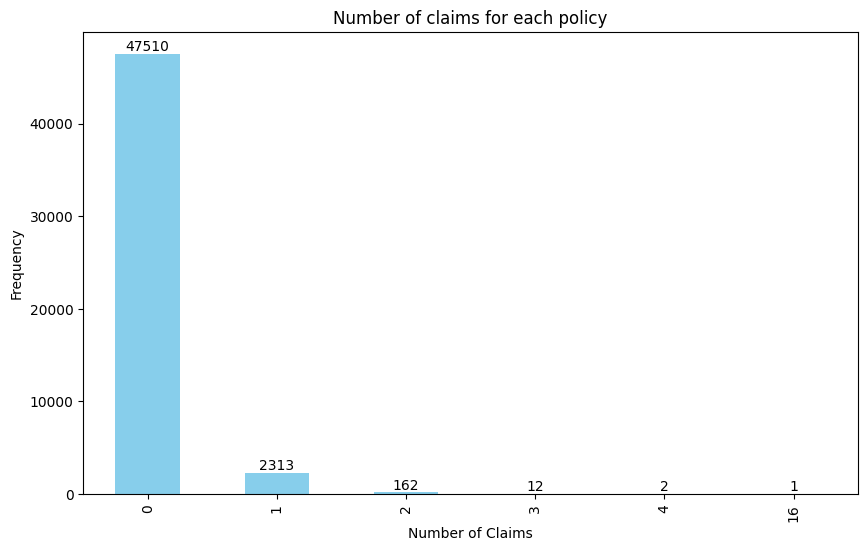

In [6]:
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
ax = number['nclaims'].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Add exact numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.title('Number of claims for each policy')
plt.xlabel('Number of Claims')
plt.ylabel('Frequency')

In [7]:
# Frequency
baseFREQ = portfolio.merge(number, on='ncontract')
baseFREQ.head(6)

,ncontract,exposition,zone,power,agevehicle,agedriver,bonus,brand,fuel,popdensity,region,nclaims
0,27,0.87,C,7,0,56,50,12,D,93,13,0
1,115,0.72,D,5,0,45,50,12,E,54,13,0
2,121,0.05,C,6,0,37,55,12,D,11,13,0
3,142,0.90,C,10,10,42,50,12,D,93,13,0
4,155,0.12,C,7,0,59,50,12,E,73,13,0
5,186,0.83,C,5,0,75,50,12,E,42,13,0


In [8]:
# Severity
baseSEV = portfolio.merge(TPclaims, on='ncontract')
baseSEV = baseSEV[baseSEV['cost'] > 0]
baseSEV.tail(6)

,ncontract,exposition,zone,power,agevehicle,agedriver,bonus,brand,fuel,popdensity,region,n,coverage,cost
2691,6104006,0.37,E,6,1,32,57,12,E,93,10,11933,1RC,5376.04
2692,6107355,0.74,E,4,1,45,57,12,E,72,10,12349,1RC,51.63
2693,6108364,0.74,B,9,1,32,100,12,E,83,0,13229,1RC,1320.00
2694,6109171,0.74,B,13,1,56,50,12,E,93,13,11567,1RC,1320.00
2695,6111208,0.49,E,10,5,30,90,12,E,53,2,14161,1RC,970.20
2696,6111650,0.48,E,4,0,69,50,12,E,93,13,14476,1RC,1940.40


## <b><span style='color:#e61227'>|</span> Part I</b>

### <b>1 <span style='color:#e61227'>|</span> Perform a descriptive statistical data analysis of the Number of Claims of the Third Party Liability on Automobile Insurance. Comment on the features observed and highlight values or patterns that you think are important to characterize the phenomenom.
</b>

We can formulate a function to compute this given a categorical_variable name in baseFREQ:

In [9]:
N = baseFREQ['nclaims']
E = baseFREQ['exposition']

def get_yearly_claims(categorical_variable):
    #total claims for feature
    total_claims = baseFREQ.nclaims.groupby(baseFREQ[categorical_variable]).sum()
    #total years covered in contracts for feature
    total_exposition = baseFREQ.exposition.groupby(baseFREQ[categorical_variable]).sum()
    #average claims per year in contracts for feature
    return total_claims/total_exposition

def plot_yearly_claims(feature):
    plt.figure(figsize=(10, 6))
    data = pd.DataFrame(get_yearly_claims(feature), columns=['claim_freq'])
    bars = plt.bar(data.index, data['claim_freq'], color='skyblue')
    plt.xlabel(f'{feature}')
    plt.ylabel('Claims per year')
    plt.title(f'Values by {feature}')
    plt.ylim(0, 0.15)
    
    # Adding numbers on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.6f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')
    
    plt.show()

baseFREQ

,ncontract,exposition,zone,power,agevehicle,agedriver,bonus,brand,fuel,popdensity,region,nclaims
0,27,0.870000,C,7,0,56,50,12,D,93,13,0
1,115,0.720000,D,5,0,45,50,12,E,54,13,0
2,121,0.050000,C,6,0,37,55,12,D,11,13,0
3,142,0.900000,C,10,10,42,50,12,D,93,13,0
4,155,0.120000,C,7,0,59,50,12,E,73,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,6114232,0.030000,E,7,0,43,50,12,E,11,13,0
49996,6114236,0.030000,A,11,0,56,50,12,D,94,13,0
49997,6114283,0.010000,E,9,0,32,72,12,D,93,6,0
49998,6114296,0.005479,E,4,0,22,90,12,E,93,2,0


In [10]:
# Function that constructs a graphic with claim frequency over risk levels
# Includes estimate through confidence interval for claim frequency
def interactiongraphic(title="Claim Frequency vs Age of the Driver", name="agedriver", lev=[17, 21, 24, 29, 34, 44, 64, 84, 100], contin=True, rotation=45):
    if contin:
        X = pd.cut(baseFREQ[name], bins=lev)
    else:
        X = baseFREQ[name].astype('category')
    
    E = baseFREQ['exposition']
    Y = baseFREQ['nclaims']
    FREQ = X.cat.categories
    mea, variance, n = [], [], []
    
    for k in FREQ:
        mask = X == k
        if mask.sum() > 0:
            weighted_mean = np.average(Y[mask] / E[mask], weights=E[mask])
            mea.append(weighted_mean)
            variance.append(np.average((Y[mask] / E[mask] - weighted_mean) ** 2, weights=E[mask]))
            n.append(E[mask].sum())
        else:
            mea.append(np.nan)
            variance.append(np.nan)
            n.append(0)
    
    mea = np.array(mea)
    variance = np.array(variance)
    n = np.array(n)
    
    fig, ax1 = plt.subplots()

    bars = ax1.bar(np.arange(len(FREQ)), n, color='lightblue')
    mid = [bar.get_x() + bar.get_width() / 2 for bar in bars]
    
    ax1.set_ylabel('Exposition', color='lightblue')
    ax1.tick_params(axis='y', labelcolor='lightblue')
    
    ax2 = ax1.twinx()
    
    IC1 = mea + 1.96 / np.sqrt(n) * np.sqrt(variance)
    IC2 = mea - 1.96 / np.sqrt(n) * np.sqrt(variance)
    globalmean = Y.sum() / E.sum()
    
    ax2.errorbar(mid, mea, yerr=[mea - IC2, IC1 - mea], fmt='o', color='red', capsize=5)
    ax2.plot(mid, mea, 'r-')  # Line connecting the points
    ax2.axhline(y=globalmean, color='red', linestyle='--')
    ax2.set_ylabel('Annual Frequency', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    plt.title(title)
    plt.xticks(np.arange(len(FREQ)), FREQ, rotation=rotation)
    fig.tight_layout()
    plt.show()


We can analyze feature by feature now. What we're trying to study is how likely someone with a given characteric of a feature (e.g. uses diesel for fuel) is to make a claim per year.

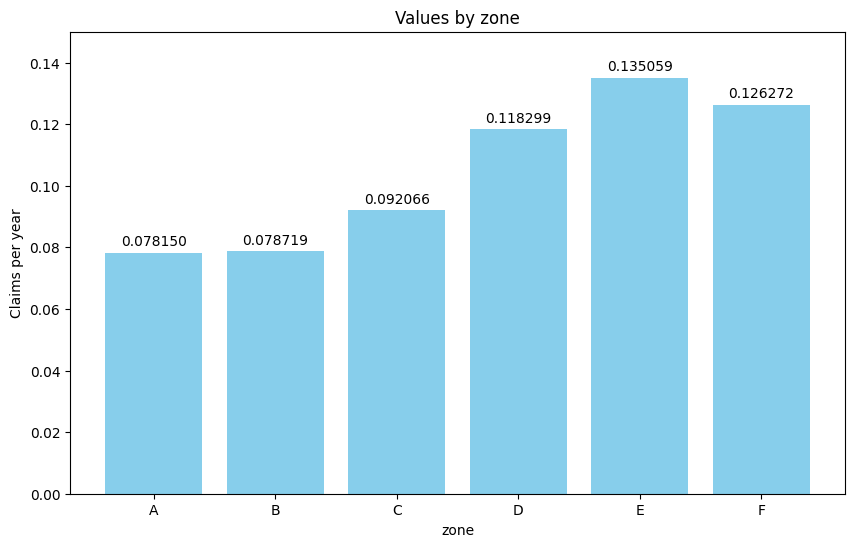

In [11]:
plot_yearly_claims('zone')

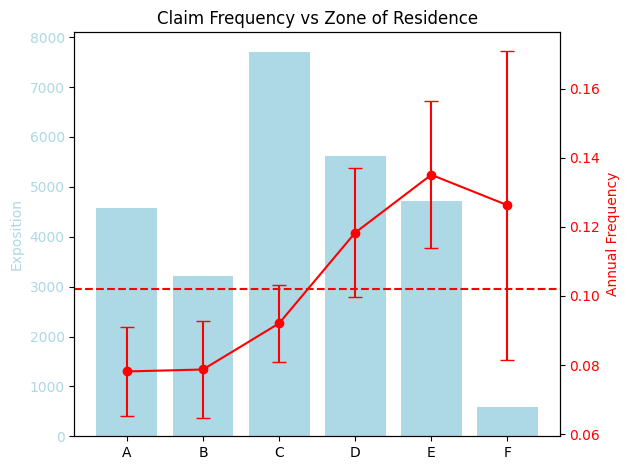

In [12]:
interactiongraphic(title="Claim Frequency vs Zone of Residence", name="zone", contin=False)

Analyzing by zone, we can clearly see that a customer on zone A is the less likely to make a claim per year, while customers on zones D, E, and F are more likely. Almost double more likely.
In the case of F, we can see that our exposition is low this means that people in zone F are the least insured by us.

---------------------------
We can now analyze power:

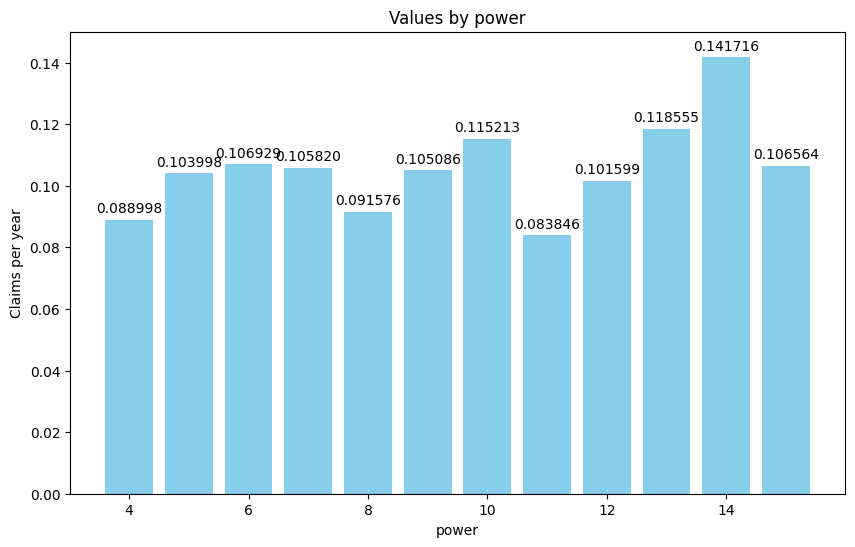

In [13]:
plot_yearly_claims('power')

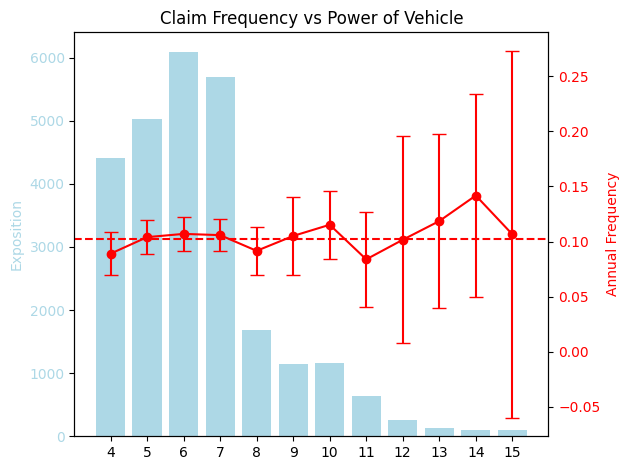

In [14]:
interactiongraphic(title="Claim Frequency vs Power of Vehicle", name="power", contin=False)

It seems that the majority of the insured have lower power cars and that, on average, there's more claims for higher powered cars.

-------------------------------------------------------

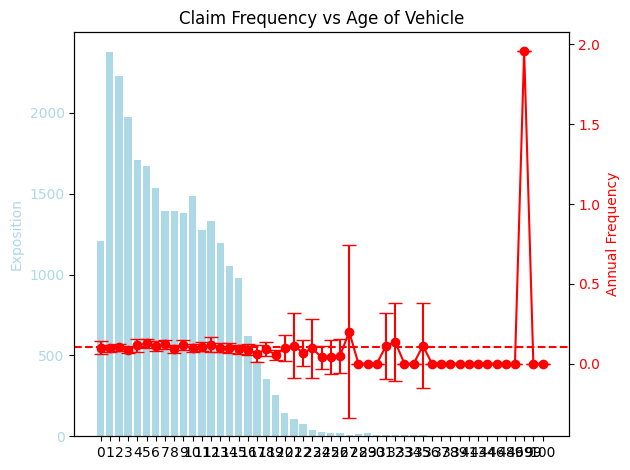

In [15]:
interactiongraphic(title="Claim Frequency vs Age of Vehicle", name="agevehicle", contin=False)

Analyzing the age of the vehicle, we can see that it's not really indicative of the number of claims, unless it's an older car. This is probably because people tend to drive older cars more carefully or collect them...

---------------------------

[ 17.  28.  32.  36.  40.  44.  49.  53.  57.  65. 100.]


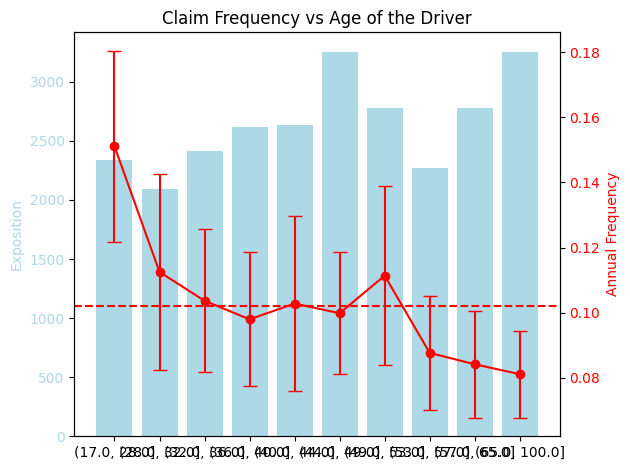

In [16]:
Q = baseFREQ['agedriver'].quantile(np.arange(0, 1.1, 0.1))
Q.iloc[0] = Q.iloc[0] - 1
print(Q.values)
interactiongraphic(name="agedriver", lev=Q.values, contin=True)

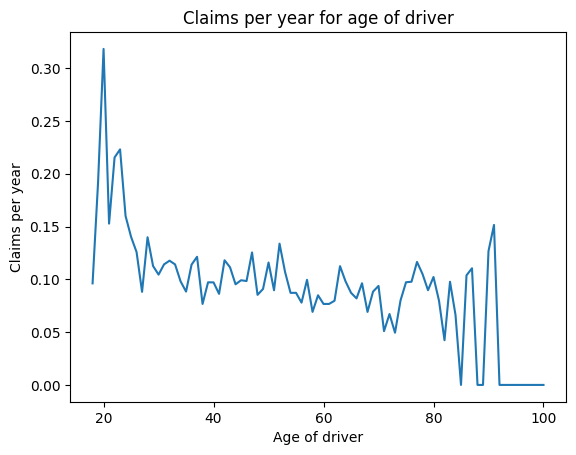

In [67]:
plt.figure()
plt.title('Claims per year for age of driver')
get_yearly_claims('agedriver').plot()
plt.xlabel("Age of driver")
plt.ylabel("Claims per year")
plt.show()

The tendency here is simple: younger drivers tend to have more claims per year than older ones.

------------------

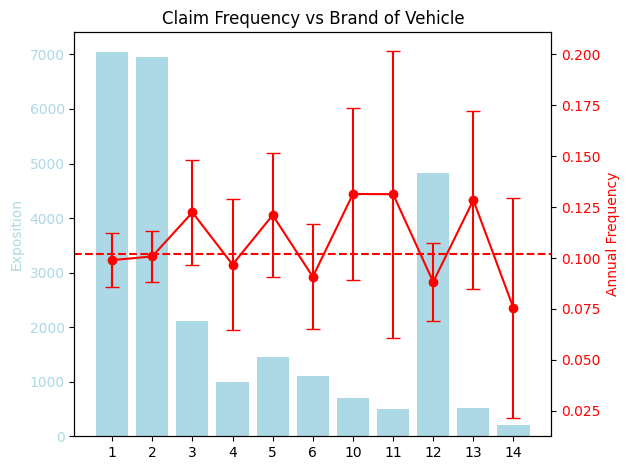

In [68]:
# Brand of Vehicle
interactiongraphic(title="Claim Frequency vs Brand of Vehicle", name="brand", contin=False)

We can see that brands 1 and 2 are the most exposed. This makes sense since brands 1 and 2 correspond to high-selling brands like Renault, Peugeot, and Nissan. In general, the number of claims per year does differ from brand to brand, but not by much.

--------------------------

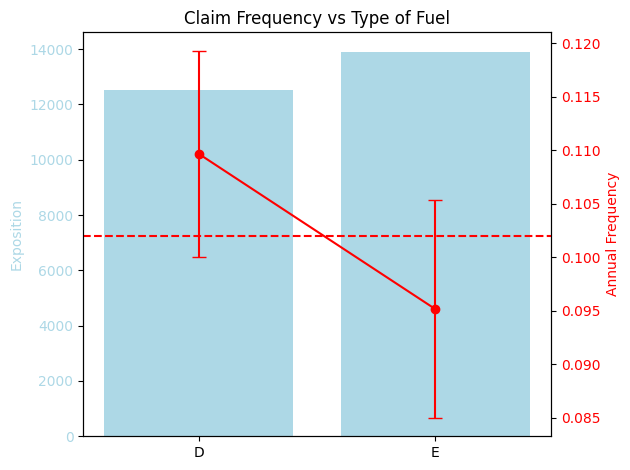

In [69]:
interactiongraphic(title="Claim Frequency vs Type of Fuel", name="fuel", contin=False)

We can see here that clearly the fuel is a factor in claim frequency, being that despite being more insured, Gasoline presents less claims per year than Diesel. This is because usually Diesel drivers tend to be drivers that must do more km per day than gasoline, so since they're more time in the road, are more exposed.

--------------------------------------

### <b>2 <span style='color:#e61227'>|</span> Perform a descriptive statistical data analysis of Claims Severity of the Third Party Liability on Automobile Insurance. Comment on the features observed and highlight values or patterns that you think are important to characterize the phenomenom.</b>

In [70]:
vcCOST = baseSEV.cost.std() / baseSEV.cost.mean()
baseSEV.cost.describe()

count     1924.000000
mean      1715.510655
std       3449.713150
min          0.010000
25%        661.997500
50%       1172.000000
75%       1309.690000
max      75000.000000
Name: cost, dtype: float64

We can see that the severity/cost, is on average 1715.51€ with a standard deviation of 3449.71€. The maximum claim made was for 75000€.

0.50     1172.0000
0.90     2963.2200
0.95     5057.5960
0.99    16018.4803
Name: cost, dtype: float64


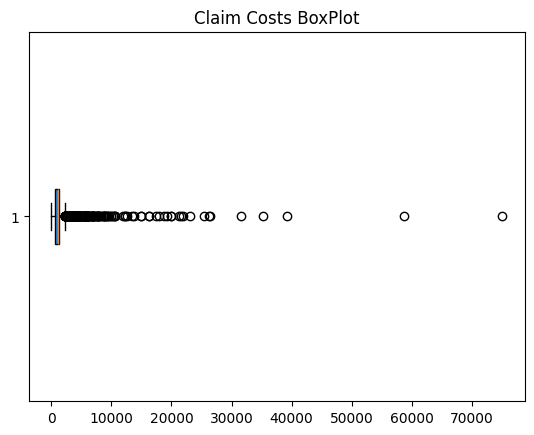

In [71]:
# quantiles, boxplot
print(baseSEV['cost'].quantile([0.5, 0.9, 0.95, 0.99]))
plt.boxplot(baseSEV['cost'], vert=False, patch_artist=True, boxprops=dict(facecolor='dodgerblue'))
plt.title("Claim Costs BoxPlot")
plt.show()

Looking above, we can see that up to 95% of claims cost less than or equal to 5057.59€. We do, however, have huge outliers in this value, which means our losses 5% of the time will be much bigger than 5057.59€.

Our approach will be to segment the data into two sets: a common set up to 95% of the claims, and a large outlier set. For rounding, we will set the common limit to 5060€.

In [72]:
limSup = 5060
baseSEV_withlim = baseSEV[baseSEV['cost'] <= limSup]
baseSEV_large = baseSEV[baseSEV['cost'] > limSup]
print("Total claims:", baseSEV.shape[0])
print(f"Common claims (up to {limSup}€):", baseSEV_withlim.shape[0])
print(f"Large claims (more than {limSup}€):",baseSEV_large.shape[0])

Total claims: 1924
Common claims (up to 5060€): 1827
Large claims (more than 5060€): 97


-----------------------------

In [73]:
baseSEV_withlim['cost'].describe()

count    1827.000000
mean     1176.664559
std       878.730250
min         0.010000
25%       602.000000
50%      1128.120000
75%      1204.000000
max      5000.000000
Name: cost, dtype: float64

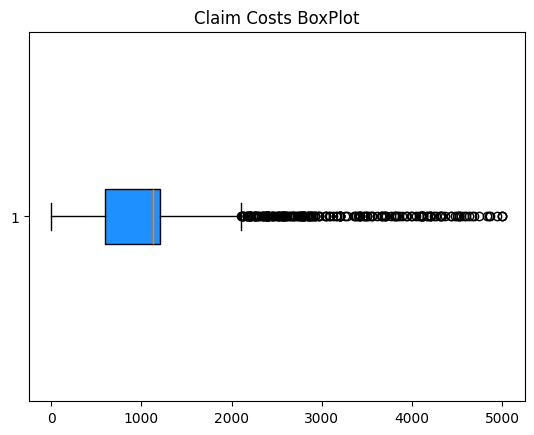

In [74]:
# Boxplot
plt.boxplot(baseSEV_withlim['cost'], vert=False, patch_artist=True, boxprops=dict(facecolor='dodgerblue'))
plt.title("Claim Costs BoxPlot")
plt.show()

The central box represents the range inbetween quartiles where the middle 50% of the data lies, in our case the region a bit under 1200 meaning half of the claims are lower than 1200€, with the median indicated by the line inside the box. Having the whiskers going to the max of approx. 2000€. We can see that we still have quite a lot of outliers when looking at the box plot, but we can see a clear evolution in the readibility of the boxplot compared to the past one.

### <b>3 <span style='color:#e61227'>|</span> Fit distributions to the Number of Claims and Claim Severity.
- For the Number of Claims, remove the highest outlier from data. Refer that fact on your report.
- For Claims Severity, choose an upper bound that allows you to fit a distribution of the Exponential Family. Refer, on your report, the upper bound considered and the number of claims removed from data and give a comment on the choice of the upper bound.
- What is the mean value and standard deviation of the claims removed from data in question 3? Plot the removed data in a histogram and a boxplot. Comment. Give your opinion on how should the insurer include that data on the final premium structure.</b>

We will start by removing the highest outlier from the number of claims data:

<Axes: >

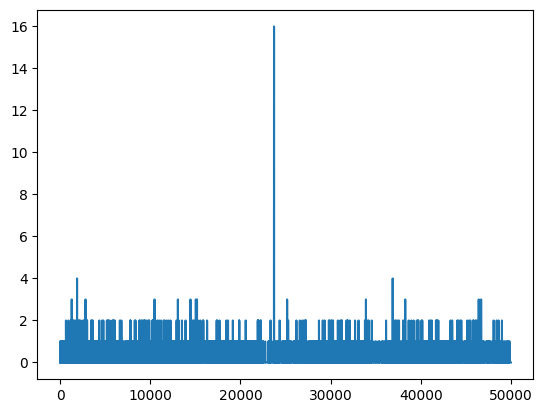

In [75]:
baseFREQ.nclaims.plot()

We can notice there is a big outlier in the number of claims, situated in the middle of the dataset. This outlier has 16 claims. We will now remove it from our dataset...

In [76]:
baseFREQ = baseFREQ[ baseFREQ.nclaims < baseFREQ.nclaims.max() ]
baseFREQ.to_csv('out/baseFREQ-cleaned.csv')

We can now attempt to fit a distribution to number of claims. This is a discrete variable and since we're dealing the number of claims in a year, it's reasonable to check the exponential family, starting with the Poisson distribution.


In [77]:
print("NClaims Mean:", baseFREQ.nclaims.mean())
print("NClaims Std:", baseFREQ.nclaims.std())

NClaims Mean: 0.05362107242144843
NClaims Std: 0.24320198186881894


Looking above, we can see that it's very unlikely that this is a Poisson distribution because if it were the mean and standard deviation should be identical (or near). In any case, we can perform a goodness of fit chi-square test:

In [78]:
import scipy.stats as stats
import statsmodels.stats.api as sms

def goodfit_chi_square_poisson(x):
    lambda_poisson = np.mean(x)
    print(f"Estimated Poisson lambda: {lambda_poisson}")
    
    def poisson_distfn(x, lambda_poisson):
        return stats.poisson.pmf(x, lambda_poisson)
    
    # Calculate observed frequencies
    observed_freqs = np.bincount(x)
    
    # Calculate expected frequencies under the Poisson distribution
    expected_freqs = poisson_distfn(np.arange(len(observed_freqs)), lambda_poisson) * len(x)
    
    # Calculate likelihood ratio chi-squared statistic
    likelihood_ratio_stat = 2 * np.sum(observed_freqs * np.log(observed_freqs / expected_freqs))
    
    # Degrees of freedom
    df = len(observed_freqs) - 2
    
    # Calculate p-value using chi-squared distribution
    p_value = 1 - stats.chi2.cdf(likelihood_ratio_stat, df)

    # Print likelihood ratio chi-squared test results
    print(f"Likelihood Ratio Chi-squared Statistic: {likelihood_ratio_stat}")
    print(f"Degrees of Freedom: {df}")
    print(f"P-value: {p_value}")

goodfit_chi_square_poisson(baseFREQ.nclaims)

Estimated Poisson lambda: 0.05362107242144843
Likelihood Ratio Chi-squared Statistic: 162.93959482955717
Degrees of Freedom: 3
P-value: 0.0


Using our R script ("part1-ex3.R"), we have found that this can be fitted to a Negative Binomial distribution:

Goodness-of-fit test for nbinomial distribution

Likelihood Ratio X^2 = 0.9487168  
df = 2 

P(> X^2) = 0.6222842

----------------------------------------------------
For the claims severity, we chose an upper bound and removed claims above that limit.
We considered an upperbound of 5060€ because 95% of claims cost less than or equal to 5057.59€, and then decided to round it to an nicer number.
This process removed 97 rows from the data.

In [46]:
print("Total claims:", baseSEV.shape[0])
print(f"Common claims (up to {limSup}€):", baseSEV_withlim.shape[0])
print(f"Large claims (more than {limSup}€):",baseSEV_large.shape[0])

#export to confirm in R
baseSEV_withlim.to_csv('out/baseSEV-common.csv')
baseSEV_large.to_csv('out/baseSEV-large.csv')

Total claims: 1924
Common claims (up to 5060€): 1827
Large claims (more than 5060€): 97


In [ ]:
#TESTAR no part1-ex3.R

## <b><span style='color:#e61227'>|</span> Part II</b>

### <b>1 <span style='color:#e61227'>|</span> Fit a GLM to the Number of Claims data and estimate the claim frequency for each risk profile in your portfolio.
- Detail and justify your model assumptions and choices.
- Improve your model, using adequate statistical tests.
- Evaluate and comment on the quality of the model.
- Identify the Standard Insured characteristics and the correspondent claim frequency estimate.
- Include any comments you consider relevant.</b>

### <b>2 <span style='color:#e61227'>|</span> Fit a GLM to the Claim Costs of “common” claims.
- Be clear about your definition of “common” claim.
- Detail and justify your model assumptions and choices.
- Improve your model, using adequate statistical tests.
- Evaluate the quality of the model.
- Include any comments you consider important.
</b>

### <b>3 <span style='color:#e61227'>|</span> Propose a Pricing Structure to the “common” claims. Identify the highest and lowest insured’s risk profile and the correspondent premiums to be charged. Compare with the premium of the standard insured.</b>

### <b>4 <span style='color:#e61227'>|</span> Propose a model that allow you to include the large claims in the Pricing Structure. We may choose some Machine Learning model that, accurately predicts the probability of reporting a large claim. Justify your choice.</b>


